
- ####  *Abdelhak Kermia*


# Introduction
In today’s assignment, you will design, train, and evaluate your own Multi-Layer Perceptrons 🤓

---
## How to pass the assignment?
Below, you will find the exercise questions. Each question that awards points is numbered and displays the available points in this format: **(0 pts)**.

### Answering Questions
- Provide your answers in the cell directly below each question.
- Use **Markdown** for text-based answers (in **English**).
- Use **code cells** for implementations.
- **Incomplete or incorrect answers receive 0 points.** Partial credit may be awarded at the teacher's discretion.
- Overly detailed answers do not grant extra points. Stick to what is asked.

### Critical Thinking Questions and Bonus Exercises
- Some questions are marked with a 🧠 (Critical Thinking) or a ⭐ (Bonus Exercise). These are for self-reflection and extra practice.
- They are **optional** and do **not** award any points.
- Answering them can help reinforce your understanding.

### Important Notes
- Save your work frequently! `(Ctrl + S)`
- Before submitting, `Restart Session and Run All` cells to ensure everything works correctly.
- **You need at least 28 points out of 42 (66%) to pass ✅**
---

In [1]:
points = 42

# 1. Neural Network Fundamentals

Before diving into code, let's test your understanding of neural networks with these questions. For each topic, identify which statements are TRUE ✅ and which are FALSE ❌. Each question may have 1, 2, 3, or 4 correct answers.

- 4 correct answers: 2 points
- 3 correct answers: 1 point
- 2 or fewer correct answers: 0 points

💡 In Google Colab, you can easily add emojis to markdown cells by typing `:` followed by the emoji's name. For example, typing `:light-bulb` will display a light bulb emoji. This feature is also available as an extension in many IDEs.

#### 1.1 **(2pts) Multi-Layer Perceptron (MLP) Basics**

 A. MLPs can be used for a variety of tasks including classification and regression. ✅

 B. An MLP consists of at least one input layer, one hidden layer, and one output layer. ✅

 C. In a standard MLP, neurons in one layer are connected to all neurons in the adjacent layers. ✅

 D. MLPs automatically determine the best number of neurons needed for each layer ❌

#### 1.2 **(2pts): Data Transformation and Preprocessing**

A. `transforms.ToTensor()` converts the image into a tensor that can be used by PyTorch. ✅

B. `transforms.Normalize()` rescales pixel values to be in the range [0, 1]. ❌

C. Data augmentation techniques, like rotation or flipping, can improve the generalization of the model. ✅

D. The `DataLoader` function is only used to shuffle data and cannot load images. ❌

#### 1.3 **(2pts): Input and Output Dimensions**

A. For a 28×28 pixel grayscale image, the input dimension to an MLP would be 784. ✅

B. The number of output neurons should always equal the number of features in your input data. ❌

C. For a 10-class classification problem, we typically use 10 output neurons. ✅

D. For a 28×28 pixel RGB color image, the input dimension would be 2,352. ✅

#### 1.4 **(2pts): Hidden Dimensions in Neural Networks**

A. The hidden dimension must always match either the input or output dimension. ❌

B. Neural networks can automatically determine the best hidden dimension without any manual tuning. ❌

C. The number of hidden neurons is a hyperparameter that must be manually chosen by the model designer. ✅

D. It is common to use powers of 2 (e.g., 32, 64, 128) for hidden dimensions, but this is not a strict rule. ✅

#### 1.5 **(2pts) Activation Functions**

A. Activation functions introduce non-linearity into neural networks. ✅

B. ReLU is an activation function that outputs the input directly if it's positive, or zero otherwise. ✅

C. Every layer in a neural network must use the same activation function. ❌

D. Using no activation function (keeping the layer linear) is generally better for hidden layers. ❌

#### 1.6 **(2pts): Loss Functions and Training**

A. `CrossEntropyLoss` is commonly used for classification tasks.✅

B. `Mean Squared Error (MSE)` is typically used for regression tasks.✅

C. The loss function updates the model’s weights during training.❌

D. The optimizer adjusts the model’s weights based on the loss to minimize errors during training. ✅



---
# 2. Building a Simple Multi-Layer Perceptron

In this assignment, you'll build a Multi-Layer Perceptron (MLP) neural network from scratch to classify fashion items from the FashionMNIST dataset.

## Preparing the Environment

In [2]:
# These are the packages you'll need today
# If you're running on a local environment, make sure everything you need is installed :)

# Data manipulation and visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# PyTorch libraries for deep learning
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

# Set up visualization style
sns.set_theme(rc={'figure.figsize':(8,6)}, style="whitegrid")

# Set random seed
torch.manual_seed(42)

# Set up device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


## Preparing and Loading the Fashion MNIST dataset

### Define basic data transformations and then load the [FashionMNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist) dataset.

- Create a transformation pipeline that:
  - Converts the images to [PyTorch tensors](https://pytorch.org/vision/main/generated/torchvision.transforms.ToTensor.html?highlight=totensor#torchvision.transforms.ToTensor).
  - [Normalizes the images](https://pytorch.org/vision/main/generated/torchvision.transforms.Normalize.html) so that the pixel values are scaled to the range [-1, 1] using a mean of 0.5 and a standard deviation of 0.5.
- Using the transformation pipeline, load the `FashionMNIST` training and testing datasets. Make sure to store them in the appropriate variables for training (`train_data`) and testing (`test_data`).

In [3]:
# Transform the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the training and testing Fashion MNIST datasets
train_data = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_data = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)


100%|██████████| 26.4M/26.4M [00:04<00:00, 6.34MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 3.18MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.58MB/s]
100%|██████████| 5.15k/5.15k [00:00<?, ?B/s]


## Data Exploration

### Perform some basic data exploration on the FashionMNIST dataset.

In [4]:
# Display information about the FashionMNIST dataset
print("FashionMNIST Dataset Information:")

# Size of training and testing datasets
print("Training data size:", len(train_data))
print("Testing data size:", len(test_data))

# Number and names of classes
class_names = train_data.classes
print("Number of classes:", len(class_names))
print("Classes:", class_names)


FashionMNIST Dataset Information:
Training data size: 60000
Testing data size: 10000
Number of classes: 10
Classes: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### Visualize an image from each class of the FashionMNIST dataset.
- When accessing `train_data[idx]`, you will get a tuple containing both an image and its corresponding label. The image is a tensor, and the label is an integer representing the class.
- The `squeeze()` [method](https://pytorch.org/docs/stable/generated/torch.squeeze.html) removes any dimensions of size 1 from the tensor, making it easier to display using Matplotlib.

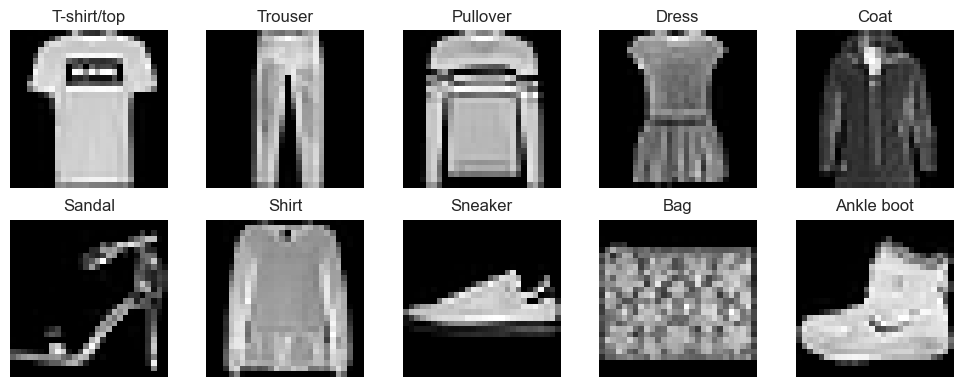

In [5]:
class_images = {i: None for i in range(10)}  # dictionary to store first image per class

# Find the first image for each class
for image, label in train_data:
    if class_images[label] is None:  # only store the first image for each class
        class_images[label] = image
    if all(value is not None for value in class_images.values()):
        break  # Stop once we've found the first image from each class

# Plotting the images in a 5x2 grid
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(class_images[i].squeeze(), cmap='gray')
    plt.title(class_names[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


#### 2.1 **(2pts) Prepare the FashionMNIST dataset for training a model in batches using a [DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).**

- Create a DataLoader for the training dataset with a batch size of 64 and shuffle the data.

- Create a DataLoader for the testing dataset with a batch size of 64, but do not shuffle the data.

In [6]:
train_loader = DataLoader(train_data , batch_size=64, shuffle=True) # https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

train_features, train_labels = next(iter(train_loader)) # image, labels tuple

print(f"Feature shape: {train_features.size()}") # 64 picture, 1 channel (grayscale) (would be 3 for rgb and 4 for rgba), height 28 pixels, width: 28 pixels
print(f"Labels shape: {train_labels.size()}") # 64 labels per batch
print(f"The number of train batches: {len(train_loader)} and test batches:  {len(test_loader )}")

Feature shape: torch.Size([64, 1, 28, 28])
Labels shape: torch.Size([64])
The number of train batches: 938 and test batches:  157


## Designing, Training, and Evaluating an MLP Neural Network

#### 2.2 **(5pts) Define a simple Multi-Layer Perceptron (MLP) model using PyTorch. The model should:**

- Have an input layer with the appropriate number of input features (for 28x28 pixel images).

- Include a hidden layer with 128 neurons and use the ReLU activation function.

- Have an output layer with 10 neurons (for a 10-class classification problem).

- Use two linear layers (one for the input to hidden layer, and one for the hidden to output layer).

- Move the model to the appropriate device (CPU or GPU).

❓ Hints:

- You’ll need to use the `nn.Linear` [class](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) for the linear layers, specifying the input and output dimensions for each layer.

- The model is [sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html), meaning the layers are stacked one after another, and the input flows through them in order.

- [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html) is the activation function used after the first linear layer to introduce non-linearity.

- After defining the model, use `model.to(device)` to [move the model to the available device](https://pytorch.org/docs/stable/generated/torch.Tensor.to.html) (GPU if available, otherwise CPU).

❗Important:

- When working with deep learning models, you typically want to use the GPU for faster computation if it's available. On Google Colab, you have limited free access to a GPU (you can enable it under Runtime > Change runtime type > Hardware accelerator > GPU).

- We set the device at the start of the notebook with the line:
```
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
```
If you change the device (e.g., to GPU), you will need to update the device assignment to match.





In [7]:
input_dim = 28*28*1 # image size in pixels : heights/width x 1 channel (in grayscale)
hidden_dim = 128 # neurone number in hidden layer
output_dim = 10 # neurone number in the output layer = number of classes for this task

# https://pytorch.org/vision/main/generated/torchvision.ops.MLP.html, https://machinelearningmastery.com/building-multilayer-perceptron-models-in-pytorch/, https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
model = nn.Sequential(
    nn.Linear(input_dim, hidden_dim), # Before the first layer we could add nn.Flatten() which does the same as .view(images.size(0), -1), but we do it manually after in our train and evaluate functions before using the model.
    nn.ReLU(),
    nn.Linear(hidden_dim, output_dim),
)

model = model.to(device)

#### 2.3 **(10pts) Write a training function for your model using the following requirements and then train your model:**

- The function should take the model, training data loader, the number of epochs (`epochs=5`), and learning rate (`lr=0.01`) as input.

- Use [Stochastic Gradient Descent (SGD)](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) as the optimizer with the specified learning rate.

- Use [Cross Entropy Loss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) as the loss function for a multi-class classification task.

- For each epoch, iterate over the training data and update the model weights using backpropagation.

- After each epoch, save and print the average loss.

- Plot the training loss over the epochs.

❓ Hints:

- Ensure the model is in training mode by calling `model.train()`.

- Flatten the images before passing them into the model, as it expects 1D vectors instead of 2D images.
  - Use `.view(images.shape[0], -1)` to [reshape](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html#torch.Tensor.view) the images.

- Move both the images and labels to the appropriate device using `.to(device)`

- [Clear previous gradients](https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.zero_grad.html) using `optimizer.zero_grad()` before each batch update.

- Perform backpropagation:
  - Compute the loss using `loss_fn(predictions, labels)`.
  - Call `loss.backward()` to [compute gradients](https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html).
  - Use `optimizer.step()` to [update the weights](https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.step.html).

- Keep track of the loss across all epochs and plot it at the end to visualize training progress.

- The training took about a minute to run on my machine with a GPU.

Epoch: Number 1 / 5 | Loss (avg.): 0.796 | Duration: 16.63s
Epoch: Number 2 / 5 | Loss (avg.): 0.523 | Duration: 13.93s
Epoch: Number 3 / 5 | Loss (avg.): 0.474 | Duration: 16.40s
Epoch: Number 4 / 5 | Loss (avg.): 0.447 | Duration: 15.17s
Epoch: Number 5 / 5 | Loss (avg.): 0.428 | Duration: 14.81s
Total runtime: 76.94 seconds


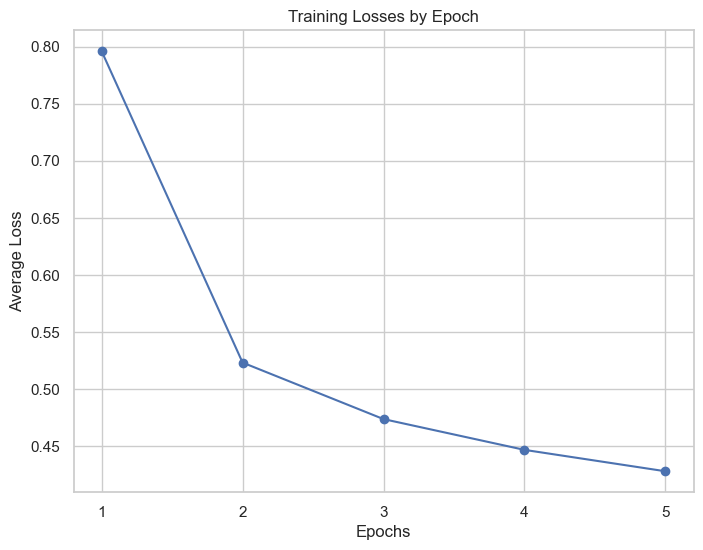

In [8]:
import time

def train(model,loader=train_loader, epochs_n=5, learning_rate=0.01, device=device): # https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html
    loss_fn = nn.CrossEntropyLoss() # Init: Loss function
    optimizer = optim.SGD(model.parameters(),lr=learning_rate) # https://pytorch.org/docs/stable/generated/torch.optim.SGD.html
    losses = [] # Init: list of the avg losses by epoch
    tot_time = 0.0 # Init: total time of training

    model.train()  # Set the model to training mode

    start_time = time.time() # Timer start to monitor epoch iteration time
    for epoch in range(epochs_n):
            epoch_loss = 0.0 # Init: epoch loss

            for batch_idx, (images, labels) in enumerate(loader): # Goes through all the batch's tuples: image data, labels(target) // Could use batch_idx to track progress for example // otherwise could simply iterate over X: images data  and y: targets/ true labels.
                # Move images, labels to the device and flatten the images in 1D on the GPU if cuda otherwise on CPU
                img_features = images.to(device).view(images.size(0), -1) # Could use reshape too
                labels = labels.to(device)

                # Compute prediction and loss
                predictions = model(img_features)
                batch_loss = loss_fn(predictions, labels) # Tensor with a single scalar loss value : average negative log-likelihood loss for the given batch

                # Back propagation
                optimizer.zero_grad()  # Clear previous gradients before update
                batch_loss.backward()
                optimizer.step()

                # Add loss of the current batch to the epoch loss
                epoch_loss += batch_loss.item()

            # Calculate and store average loss for each epoch
            epoch_avg_loss = epoch_loss / len(loader)
            losses.append(epoch_avg_loss)

            # Total Time and Duration for each epoch iteration
            elapsed_time = time.time() - start_time
            tot_time += elapsed_time

            # Print information for each epoch:
            print(f'Epoch: Number {epoch+1} / {epochs_n} | Loss (avg.): {epoch_avg_loss:.3f} | Duration: {elapsed_time:.2f}s')

            start_time = time.time() # Reset timer

    print('Total runtime:', round(tot_time,2),"seconds")

    #Plot losses evolution by epoch
    plt.plot(range(1,epochs_n+1), losses, marker='o')  # Plot losses with markers
    plt.xticks(range(1,epochs_n + 1)) # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
    plt.xlabel("Epochs")
    plt.ylabel("Average Loss")
    plt.title("Training Losses by Epoch")
    plt.show()

train(model)

#### 2.4 **(10pts) Write and run a function to evaluate the performance of your previously trained model on the test dataset. The function should compute the accuracy of the model using the following requirements:**

- Set the model to evaluation mode using `model.eval()`.

- [Do not compute gradients](https://pytorch.org/docs/stable/generated/torch.no_grad.html) by using `with torch.no_grad()` to reduce memory usage during inference.

- For each batch of images in the test loader:
  - Flatten the images and move them to the appropriate device.
  - Compute the model's output/predictions.
  - Use `torch.max` to get the [predicted class labels](https://pytorch.org/docs/stable/generated/torch.max.html) from the model's predictions.
  - Count the number of correct predictions by comparing the predicted labels with the true labels.
  - Calculate and print the overall accuracy as the percentage of correct predictions out of the total predictions.

❓ Hints:

- Use `with torch.no_grad():` to avoid updating gradients during evaluation, which saves memory and computation.

- Use `torch.max(predictions, 1)` to get the [index of the maximum value in each output row](https://pytorch.org/docs/stable/generated/torch.max.html) (the predicted class).

- To get the batch size, you can use `labels.size(0)`. This returns the [number of samples in the current batch](https://pytorch.org/docs/stable/generated/torch.Tensor.size.html), which is useful for counting the total number of predictions and correct predictions.

- Operations like `sum()` on PyTorch tensors often return a tensor containing the result. To work with this result as a single number in Python, consider using the `.item()` method to extract its value.

- Make sure to compute the accuracy based on the total number of predictions and the number of correct predictions.

📈 Expected Output:
```
Accuracy: xx.xx%
```

In [9]:
def evaluate(model, loader=test_loader, device=device): #https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html
    correct_labels = 0
    total_samples = 0

    model.eval() # Set the model to evaluation mode

    with torch.no_grad(): # No gradient calculation, since no training / no updates
            for images, labels in loader:
                    # Move images, labels to the device and flatten the images in 1D on the GPU if cuda otherwise on CPU
                    img_features = images.to(device).view(images.size(0), -1)
                    labels = labels.to(device)

                    # Compute prediction
                    predictions = model(img_features)
                    _, labels_pred = torch.max(predictions, 1) # Finds the index of the maximum value in each row / each row represents a sample (in the batch) and each column represents one class (10 columns for 10 classes).
                    # Number of row = batch_size. Shape = 64 rows(batch size) by 10 columns (classes). -> We select by row the highest score for prediction and keep only the index which is the class prediction.

                    # Count correct matches and total samples number:
                    correct_labels += (labels_pred==labels).sum().item() #  Scalar value for the sum of 1 (true) for each time a labels predictions == true labels for every sample in the batches of the test_data
                    total_samples += labels.size(0) # Could use the number of batch 157 and the size of batches 64 instead or len(test_data)

    # Overall accuracy
    accuracy = (correct_labels/total_samples)*100
    print(f'Accuracy: {accuracy:.2f}%')

evaluate(model)

Accuracy: 83.33%


#### 2.5 **(3pts) Experiment with Hyperparameters to Increase Accuracy**

In this task, your goal is to experiment with different aspects of your MLP model to improve its accuracy. Here are some ideas:

- Change Activation Functions: Experiment with ReLU, Leaky ReLU, Sigmoid, or Tanh in the hidden layers.

- Modify the Number of Neurons: Try different numbers of neurons in the hidden layers (e.g., 64, 128, 256).

- Adjust the Number of Hidden Layers: Try using 1, 2, or 3 hidden layers and see how it affects performance.

- Play with Learning Rate and Batch Size: Adjust the learning rate (e.g., 0.1, 0.001) and try different batch sizes (e.g., 32, 64).

- Use the training and evaluation functions you wrote to train the model and check its performance on the test set.

😀 **Full points will be awarded just for trying something new! No need to get the highest accuracy—focus on experimenting with different configurations and seeing how it affects your model.**

In [10]:
# Define a simple MLP model
model_improved = nn.Sequential(
    nn.Linear(input_dim, hidden_dim + 128), # Higher neurones : 256 neurones in hidden layer
    nn.ReLU(),
    nn.Linear(hidden_dim + 128, output_dim),
)

# Move model to device
model_improved = model_improved.to(device)

Epoch: Number 1 / 10 | Loss (avg.): 0.536 | Duration: 13.69s
Epoch: Number 2 / 10 | Loss (avg.): 0.391 | Duration: 14.36s
Epoch: Number 3 / 10 | Loss (avg.): 0.349 | Duration: 15.66s
Epoch: Number 4 / 10 | Loss (avg.): 0.323 | Duration: 16.50s
Epoch: Number 5 / 10 | Loss (avg.): 0.306 | Duration: 14.79s
Epoch: Number 6 / 10 | Loss (avg.): 0.291 | Duration: 13.27s
Epoch: Number 7 / 10 | Loss (avg.): 0.276 | Duration: 12.85s
Epoch: Number 8 / 10 | Loss (avg.): 0.266 | Duration: 13.40s
Epoch: Number 9 / 10 | Loss (avg.): 0.255 | Duration: 13.02s
Epoch: Number 10 / 10 | Loss (avg.): 0.244 | Duration: 12.99s
Total runtime: 140.54 seconds


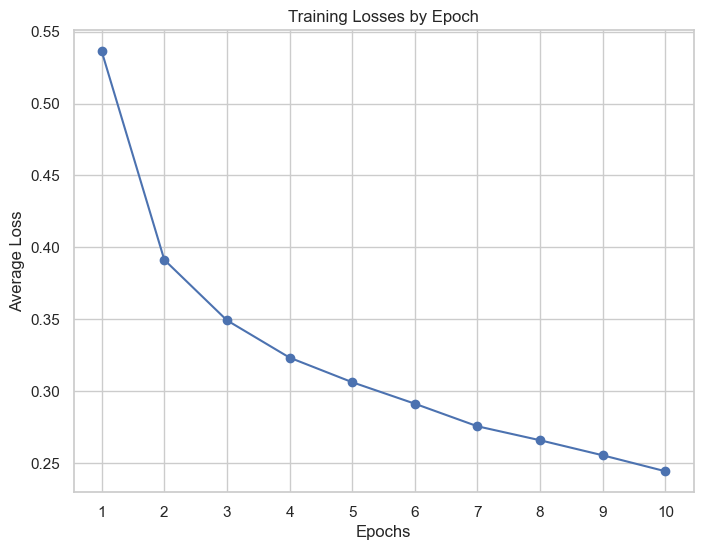

Accuracy: 86.58%


In [11]:
# Train model
train_loader = DataLoader(train_data , batch_size=32, shuffle=True) # Smaller batches
test_loader = DataLoader(test_data, batch_size=16, shuffle=False) # Smaller batches
train(model_improved, epochs_n=10, learning_rate=0.2) # More epochs and bigger steps

# Evaluate model
evaluate(model_improved)

In [12]:
points

42

**Congratulations on completing this assignment!** 🎉  

You’ve just designed, trained, and evaluated your own neural network! By tweaking hyperparameters and testing different configurations, you’ve gained valuable hands-on experience with model optimization.

Great work, and happy coding! 🚀💻